# In silico gene perturbation with CellOracle
**Authorship:** Adam Klie (last updated: 08/15/2023)<br>
***
**Description:** This notebook 

# Set-up

In [1]:
# Global imports
import os
import sys
import yaml
import datetime
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import celloracle as co

# Local imports
sys.path.append("/cellar/users/aklie/data/igvf/bin")
from utils import make_dirs

/cellar/users/aklie/opt/miniconda3/envs/celloracle/lib/python3.8/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/cellar/users/aklie/opt/miniconda3/envs/celloracle/lib/python3.8/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(

0.14.0


In [17]:
# visualization settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300

In [2]:
# Dataset
dataset_name = "igvf_sc-islet_10X-Multiome"
results_dir = "/cellar/users/aklie/projects/igvf/beta_cell_networks/infer_grns/celloracle/results"

# Inputs
in_analysis = "grn_model_construction"
in_date = "10Aug23"
in_dir = os.path.join(results_dir, dataset_name, in_date, in_analysis)
print(in_dir)

# Outputs
out_analysis = "in_silico_gene_perturbation"
out_date = "10Aug23"
out_dir = os.path.join(results_dir, dataset_name, out_date, out_analysis)
make_dirs(out_dir)

/cellar/users/aklie/projects/igvf/beta_cell_networks/infer_grns/celloracle/results/igvf_sc-islet_10X-Multiome/10Aug23/grn_model_construction


'/cellar/users/aklie/projects/igvf/beta_cell_networks/infer_grns/celloracle/results/igvf_sc-islet_10X-Multiome/10Aug23/in_silico_gene_perturbation'

In [3]:
# Make and log a yaml file with the parameters
data_params = {
    "dataset_name": dataset_name,
    "results_dir": results_dir,
    "in_analysis": in_analysis,
    "in_date": in_date,
    "in_dir": in_dir,
    "out_analysis": out_analysis,
    "out_date": out_date,
    "out_dir": out_dir,
}
version_params = {
    "Python": sys.version[:5],
    "pandas": pd.__version__,
    "numpy": np.__version__,
    "scanpy": sc.__version__,
    "seaborn": sns.__version__,
    "celloracle": co.__version__,
}
params = {"data": data_params, "versions": version_params}
if not os.path.exists(os.path.join(out_dir, "in_silico_gene_perturbation_params.yaml")):
    with open(os.path.join(out_dir, "in_silico_gene_perturbation_params.yaml"), "w") as f:
        yaml.dump(params, f)
else:
    print("params.yaml already exists, will not overwrite")

# Load data

In [5]:
# Load the links
links = co.load_hdf5(os.path.join(in_dir, "grn.celloracle.links"))
links

In [4]:
# Load the oracle
oracle = co.load_hdf5(os.path.join(in_dir, "grn.celloracle.oracle"))
oracle

Oracle object

Meta data
    celloracle version used for instantiation: 0.14.0
    n_cells: 30000
    n_genes: 2999
    cluster_name: predicted.cell.type
    dimensional_reduction_name: X_umap_wnn
    n_target_genes_in_TFdict: 19395 genes
    n_regulatory_in_TFdict: 1095 genes
    n_regulatory_in_both_TFdict_and_scRNA-seq: 151 genes
    n_target_genes_both_TFdict_and_scRNA-seq: 1903 genes
    k_for_knn_imputation: 750
Status
    Gene expression matrix: Ready
    BaseGRN: Ready
    PCA calculation: Done
    Knn imputation: Done
    GRN calculation for simulation: Not finished

In [6]:
links.filter_links()

In [7]:
oracle.get_cluster_specific_TFdict_from_Links(links_object=links)

In [8]:
oracle.fit_GRN_for_simulation(
    alpha=10,
    use_cluster_specific_TFdict=True
)

  0%|          | 0/6 [00:00<?, ?it/s]

In [15]:
oracle.adata

AnnData object with n_obs × n_vars = 30000 × 2999
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'ATAC.weight', 'wsnn_res.0.2', 'seurat_clusters', 'log_nCount_ATAC', 'log_nCount_SCT', 'log_nFeature_ATAC', 'log_nFeature_SCT', 'nCount_mpeak', 'nFeature_mpeak', 'batch', 'condition', 'time_point', 'sample', 'atac_raw_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_pct.mt', 'TSS.enrichment', 'TSS.percentile', 'mpeak.weight', 'wsnn_res.0.3', 'cell.type.1', 'cell.type.2', 'predicted.cell.type', 'predicted.cell.type.score', 'n_counts_all', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mean', 'std', 'symbol', 'isin_top1000_var_mean_genes', 'isin_TFdict_targets', 'isin_TFdict_regulators', 'isin_actve_regulators'
    uns: 'log1p', 'neighbors', 'pca', 'predicted.cell.type_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_umap_wnn'
    varm: 'PCs'
    l

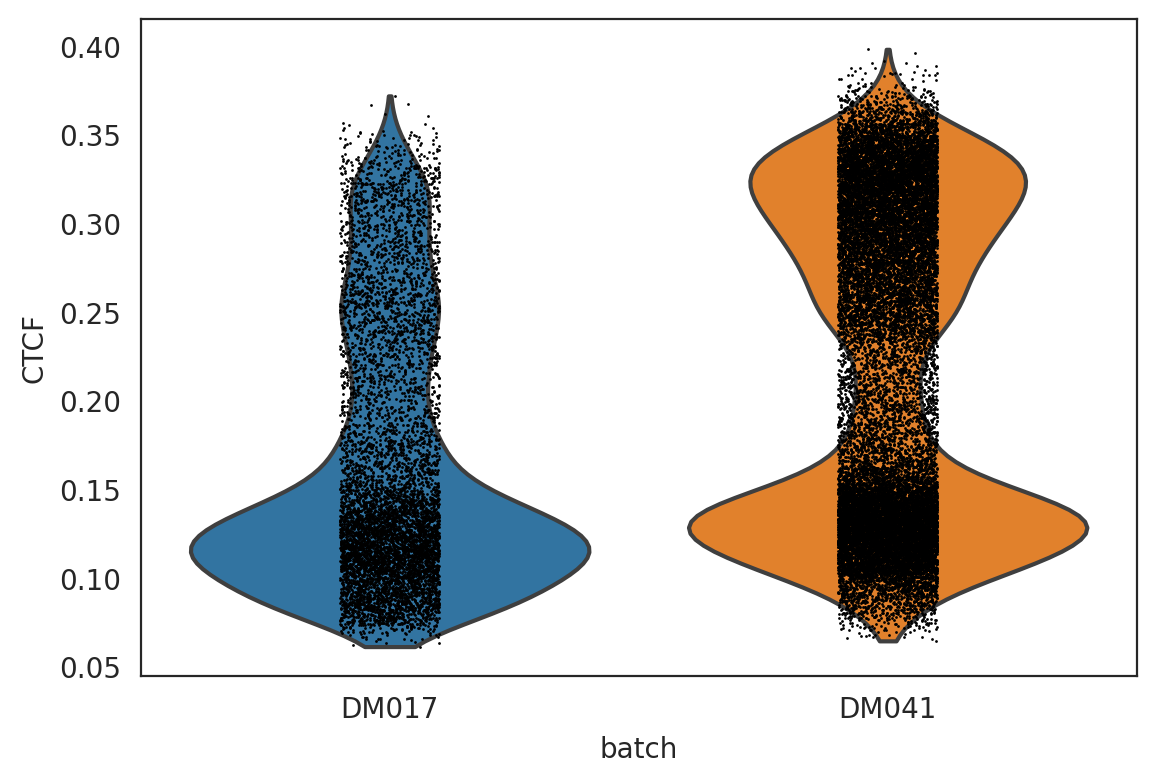

In [25]:
# By Seurat clustering
sc.pl.violin(oracle.adata, ['CTCF'], groupby='batch', multi_panel=True, layer="imputed_count", use_raw=False)

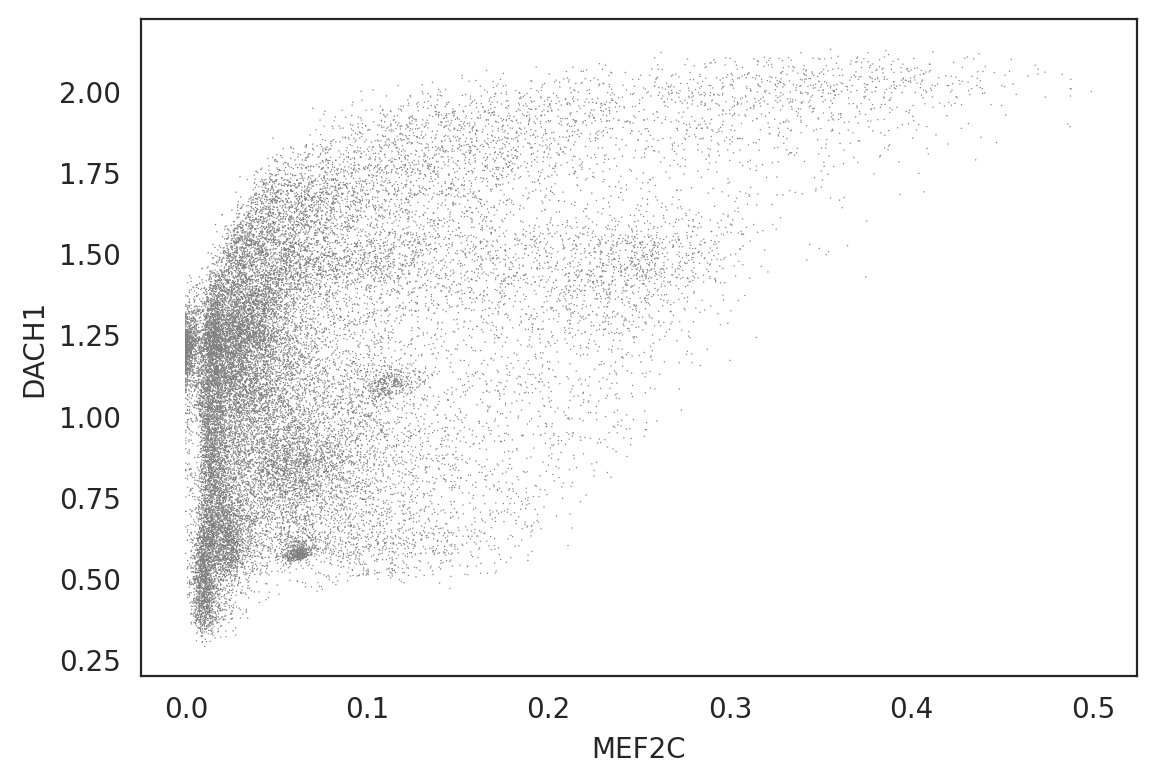

In [48]:
# Plot some scatters
plt.rcParams['figure.figsize'] = [6, 4.5]
sc.pl.scatter(oracle.adata, x='MEF2C', y='DACH1', size=1, layers="imputed_count", use_raw=False)

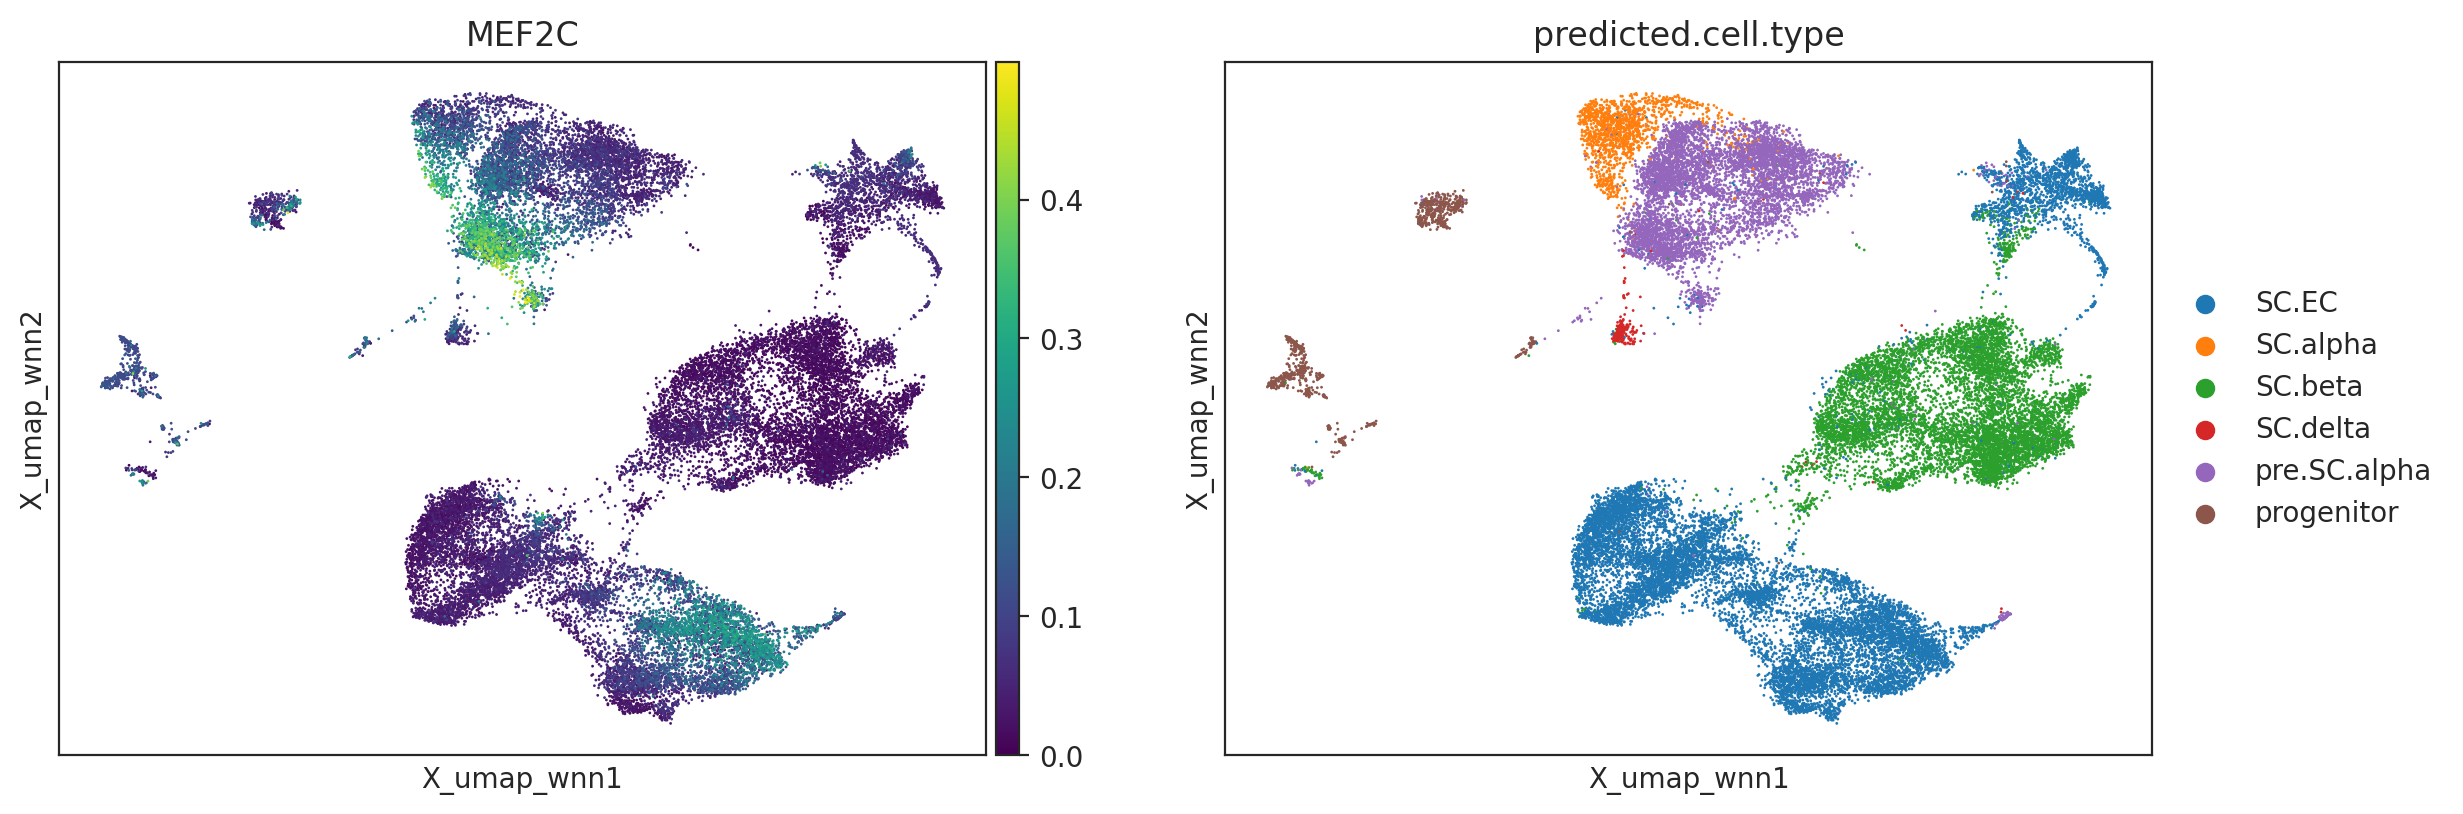

In [49]:
# Check gene expression
goi = "MEF2C"
sc.pl.embedding(
    oracle.adata, 
    color=[goi, oracle.cluster_column_name],
    layer="imputed_count", use_raw=False, cmap="viridis", basis="X_umap_wnn"
)

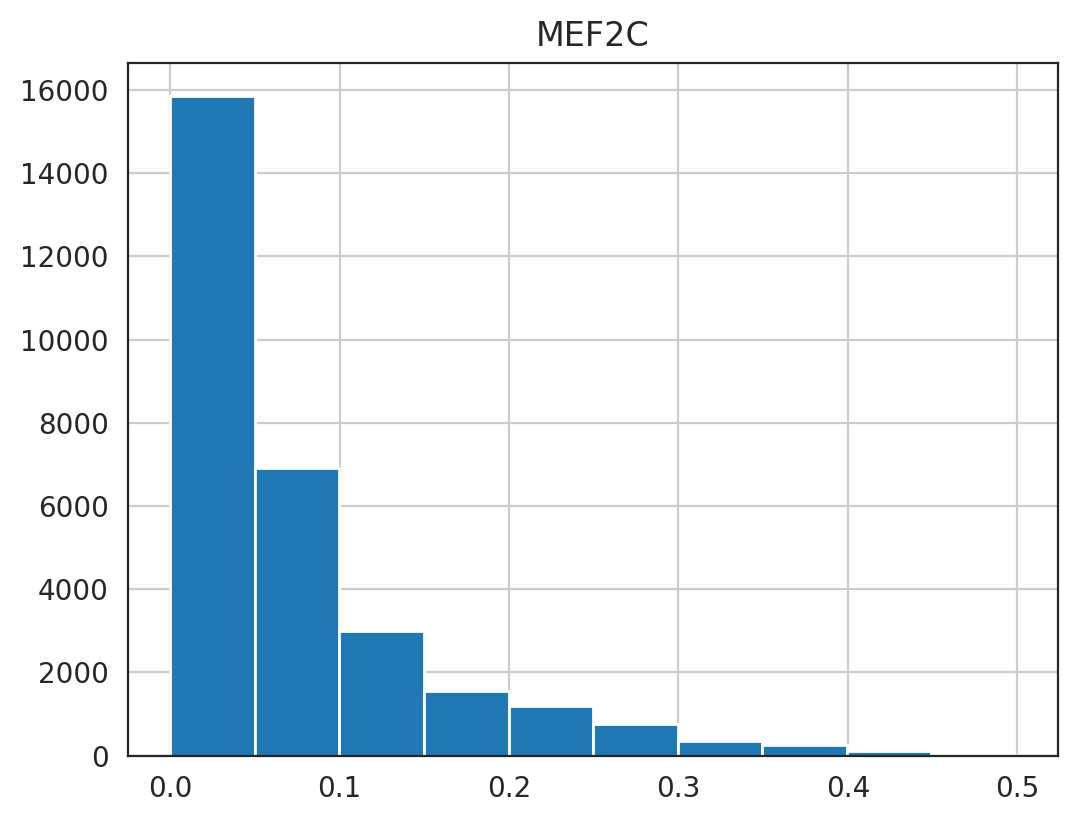

In [50]:
# Plot gene expression in histogram
sc.get.obs_df(oracle.adata, keys=[goi], layer="imputed_count").hist()
plt.show()

In [51]:
oracle.simulate_shift(
    perturb_condition={goi: 0.0}, n_propagation=3
)

In [52]:
# Get transition probability
oracle.estimate_transition_prob(n_neighbors=200,
                                knn_random=True,
                                sampled_fraction=1)

# Calculate embedding
oracle.calculate_embedding_shift(sigma_corr=0.05)

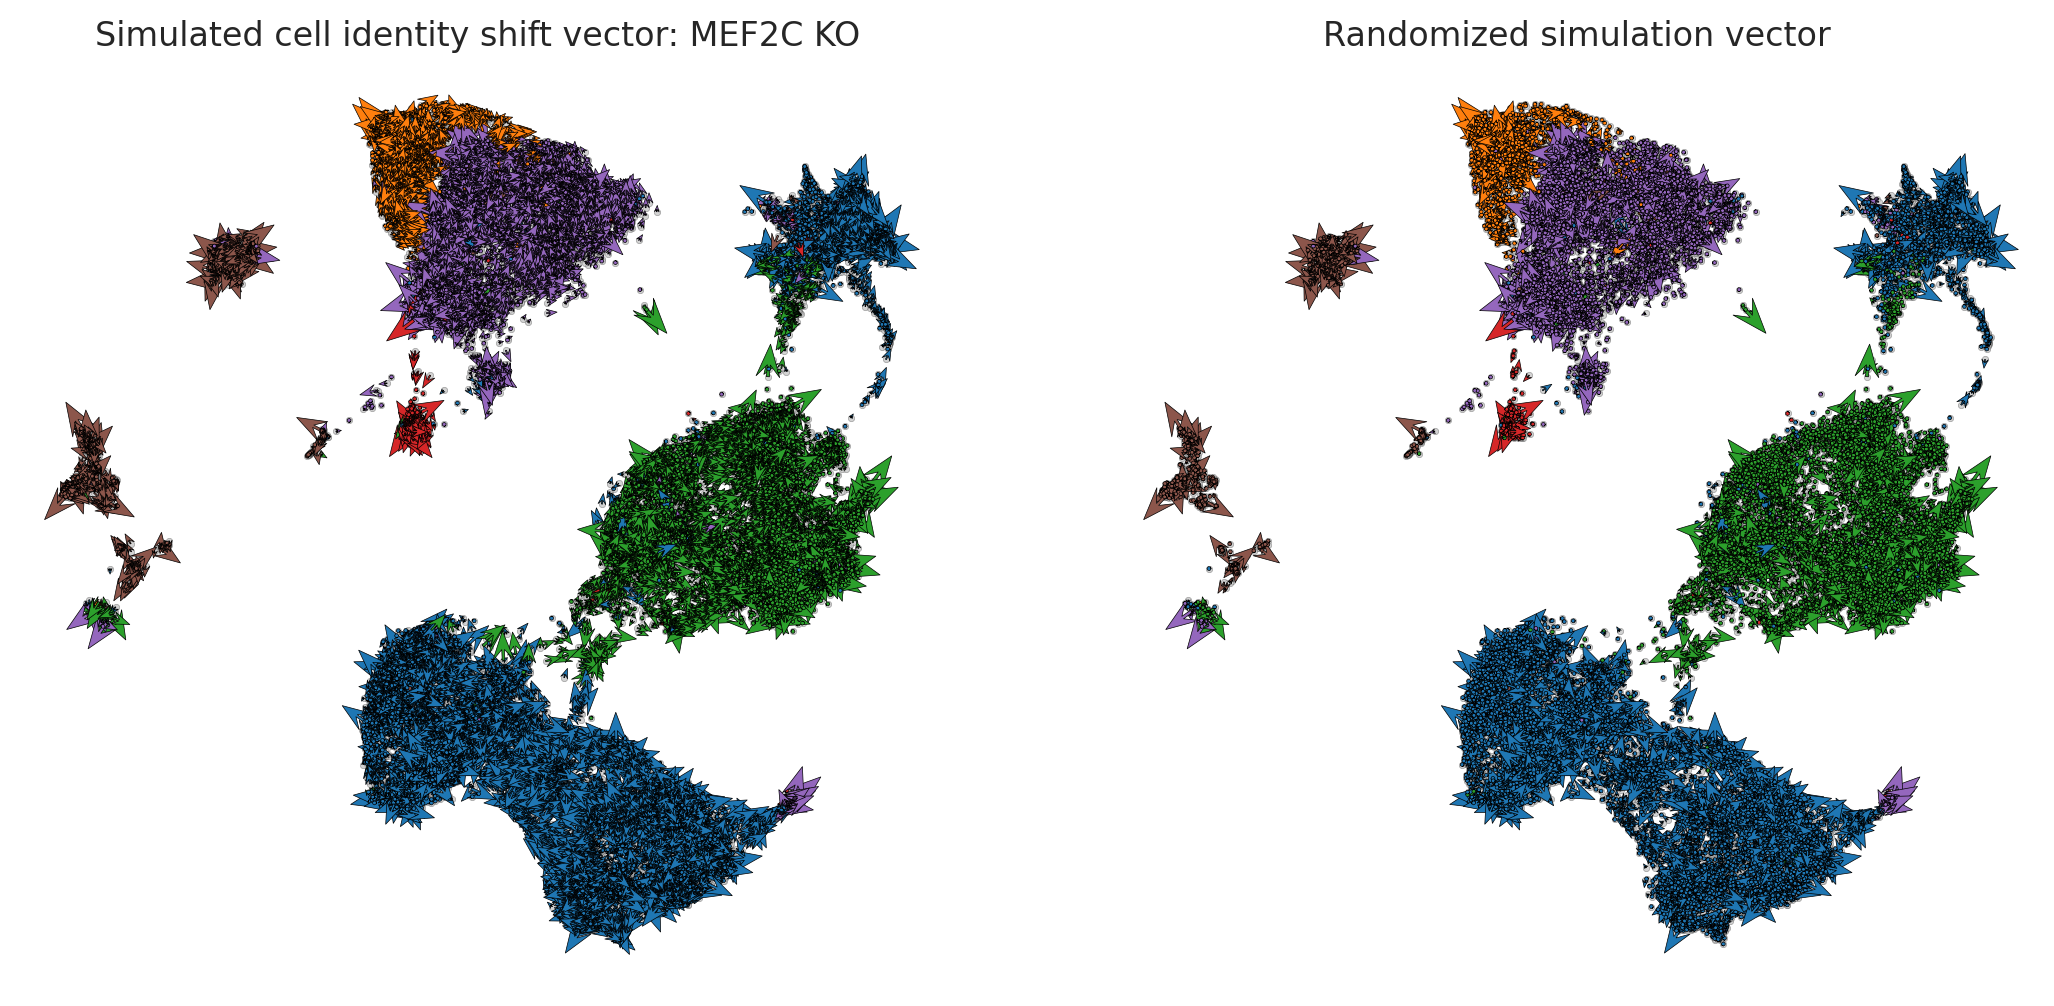

In [53]:
fig, ax = plt.subplots(1, 2,  figsize=[13, 6])

scale = 50

# Show quiver plot
oracle.plot_quiver(scale=scale, ax=ax[0])
ax[0].set_title(f"Simulated cell identity shift vector: {goi} KO")

# Show quiver plot that was calculated with randomized graph.
oracle.plot_quiver_random(scale=scale, ax=ax[1])
ax[1].set_title(f"Randomized simulation vector")

plt.show()

In [54]:
# n_grid = 40 is a good starting value.
n_grid = 40
oracle.calculate_p_mass(smooth=0.8, n_grid=n_grid, n_neighbors=200)

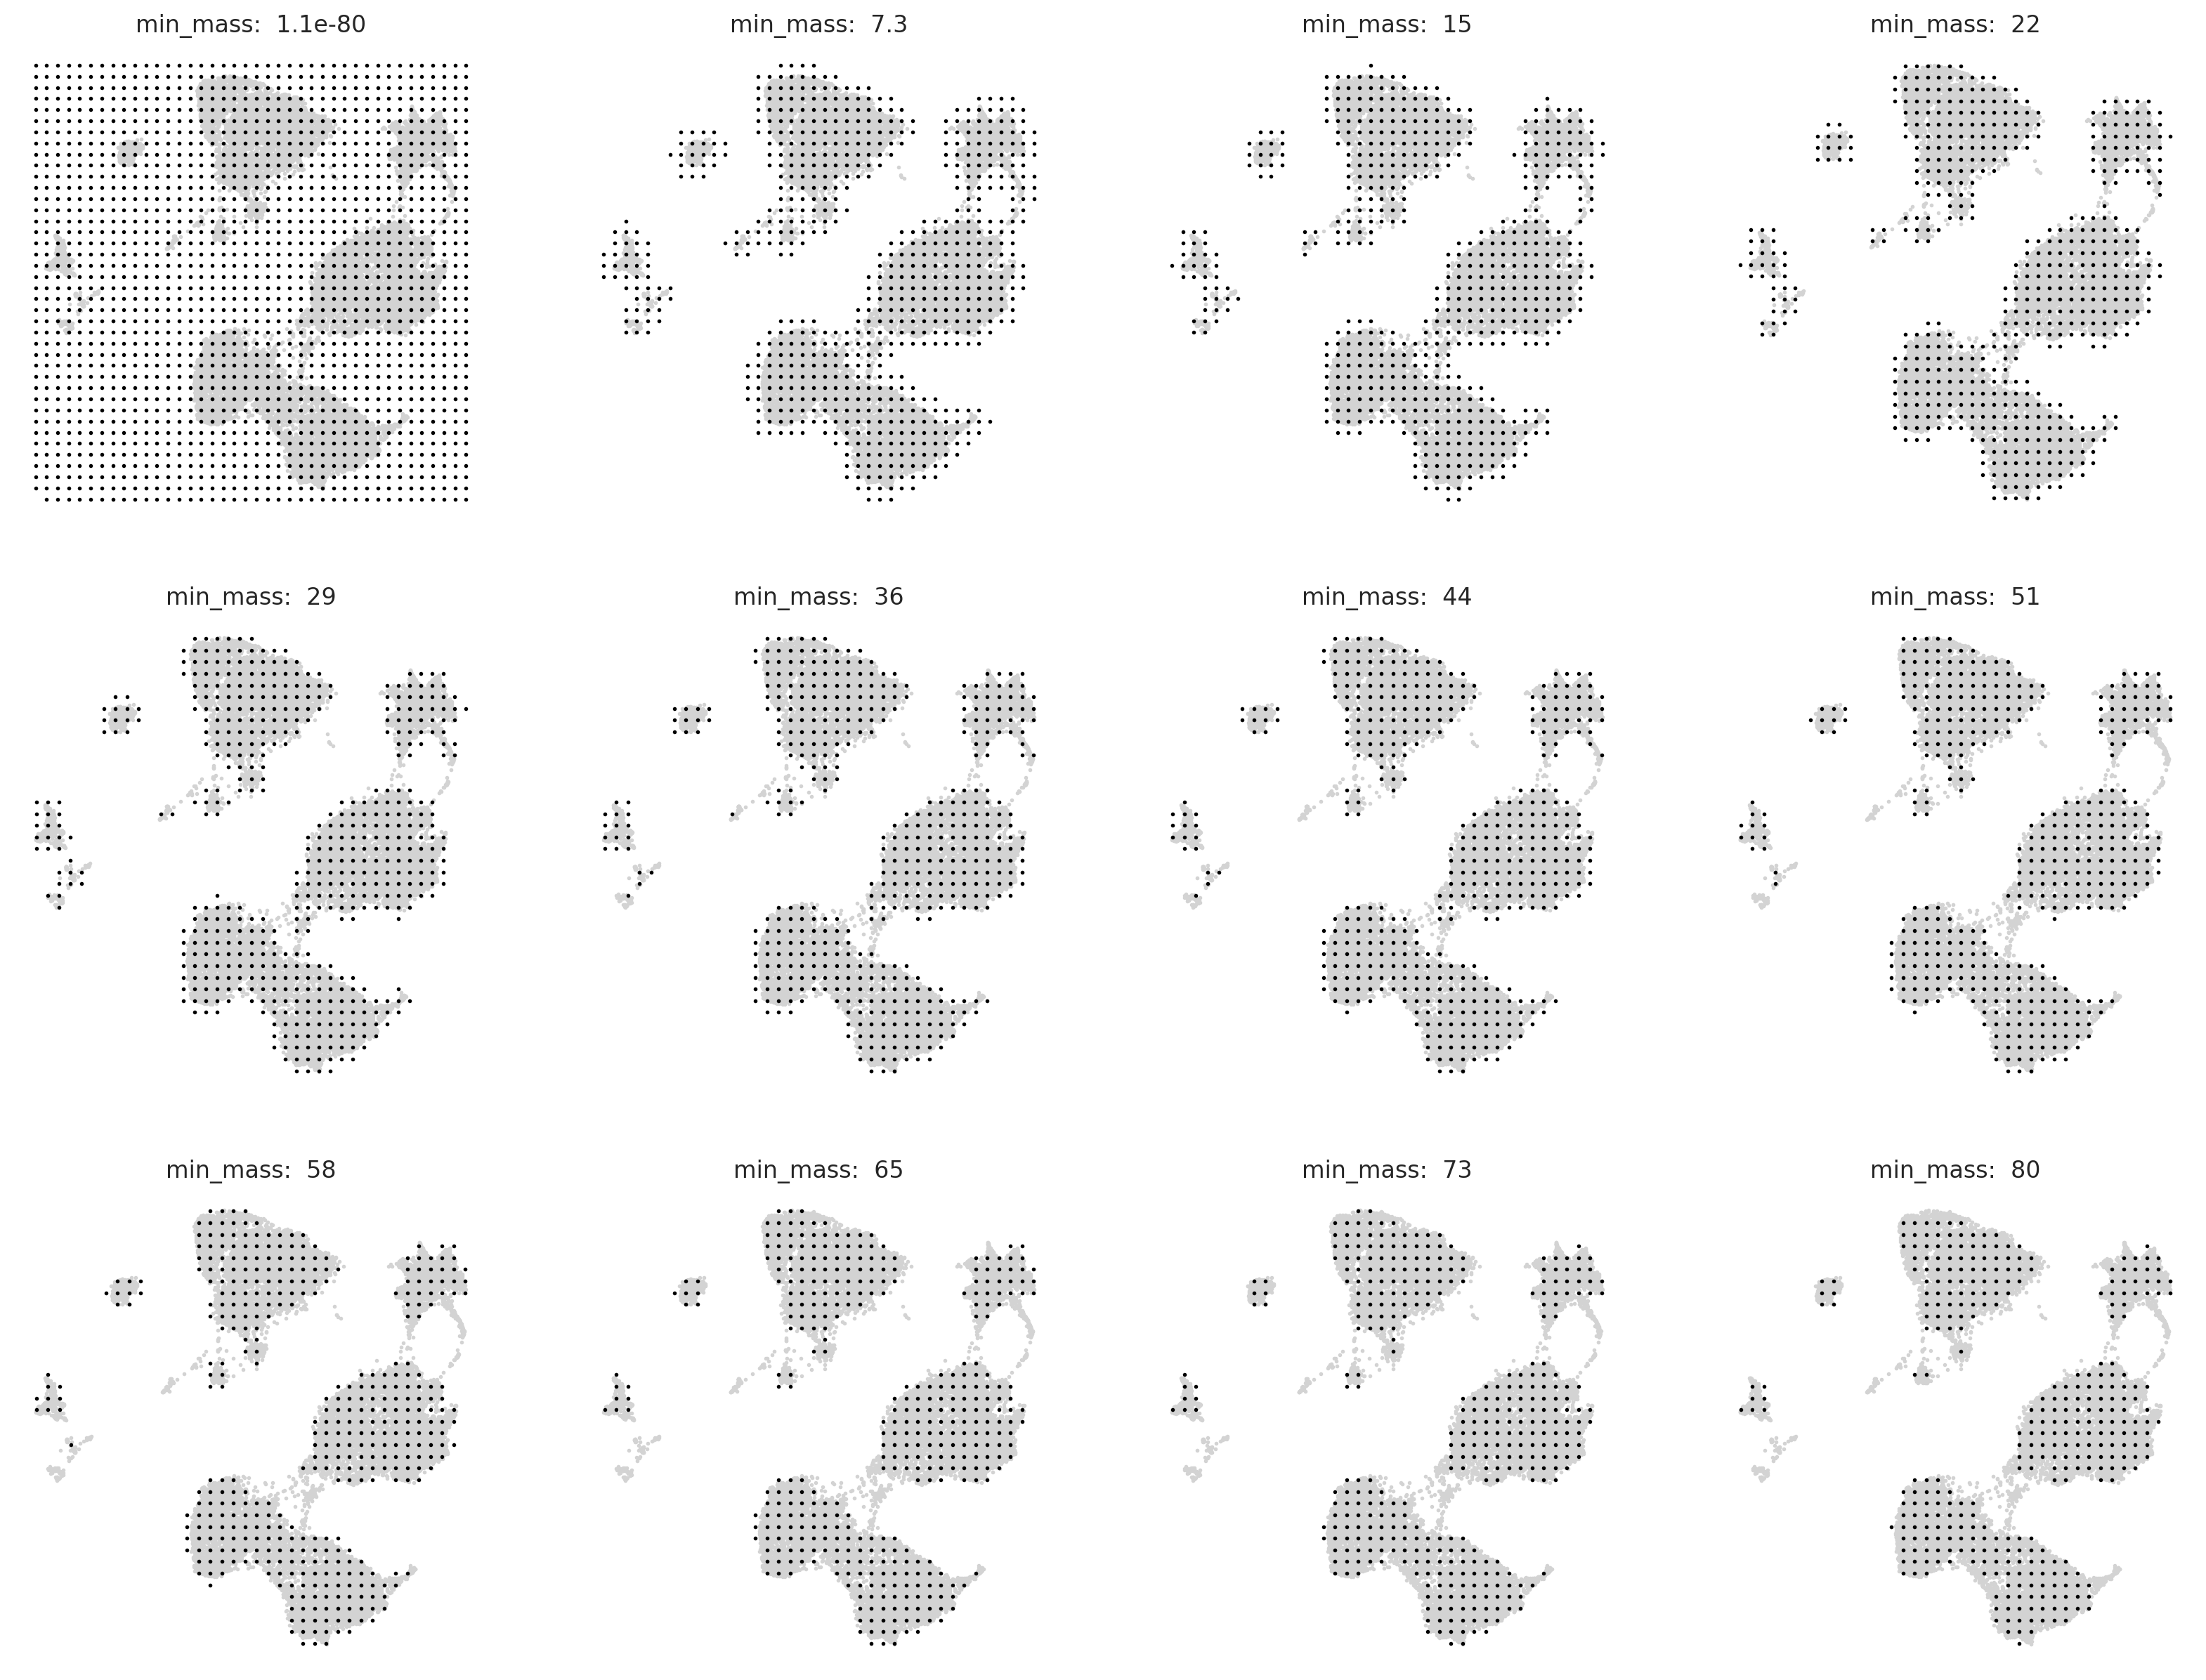

In [55]:
oracle.suggest_mass_thresholds(n_suggestion=12)

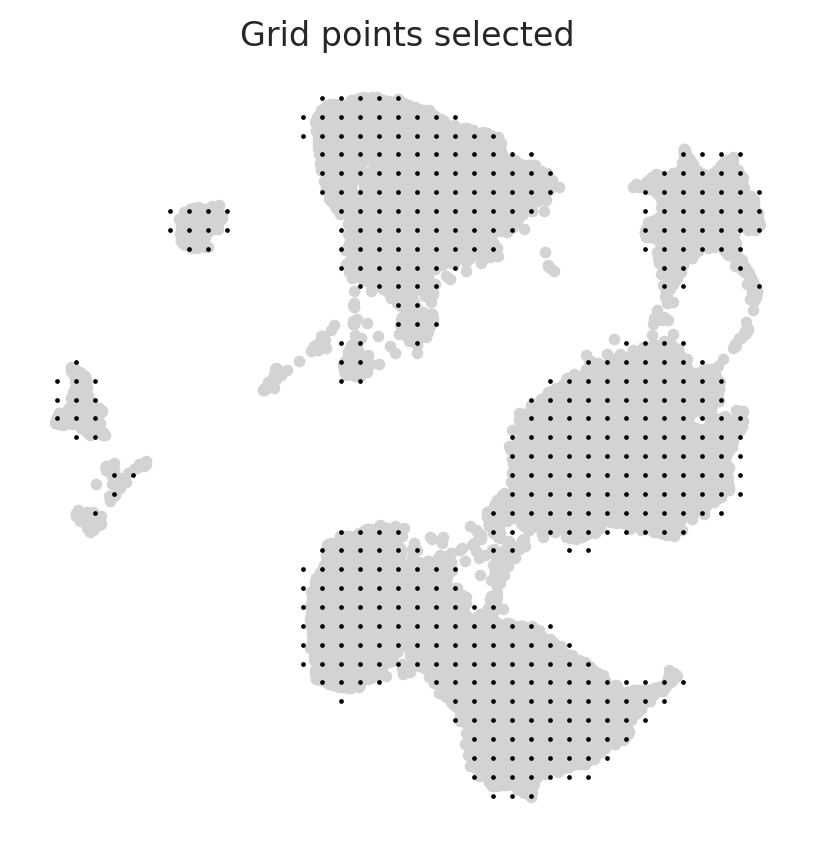

In [56]:
min_mass = 44
oracle.calculate_mass_filter(min_mass=min_mass, plot=True)

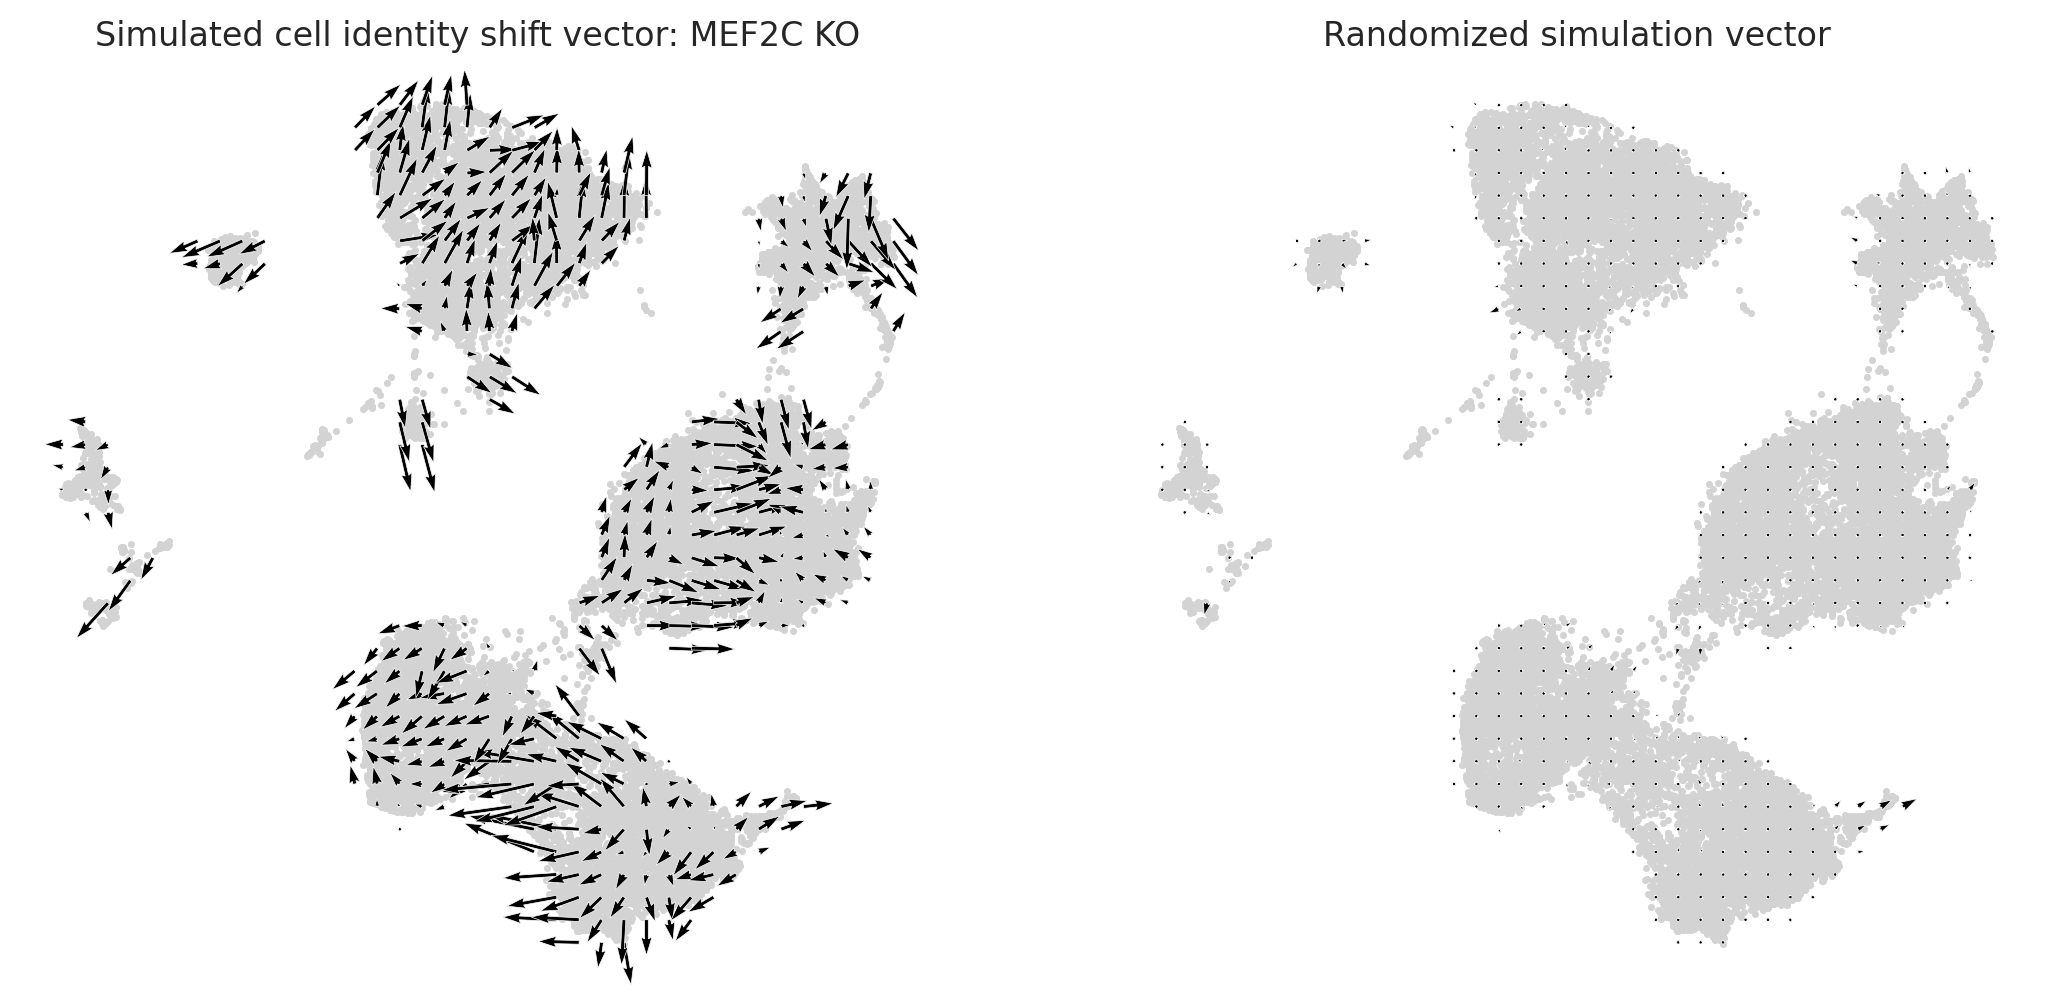

In [57]:
fig, ax = plt.subplots(1, 2,  figsize=[13, 6])

scale_simulation = 10
# Show quiver plot
oracle.plot_simulation_flow_on_grid(scale=scale_simulation, ax=ax[0])
ax[0].set_title(f"Simulated cell identity shift vector: {goi} KO")

# Show quiver plot that was calculated with randomized graph.
oracle.plot_simulation_flow_random_on_grid(scale=scale_simulation, ax=ax[1])
ax[1].set_title(f"Randomized simulation vector")

plt.show()

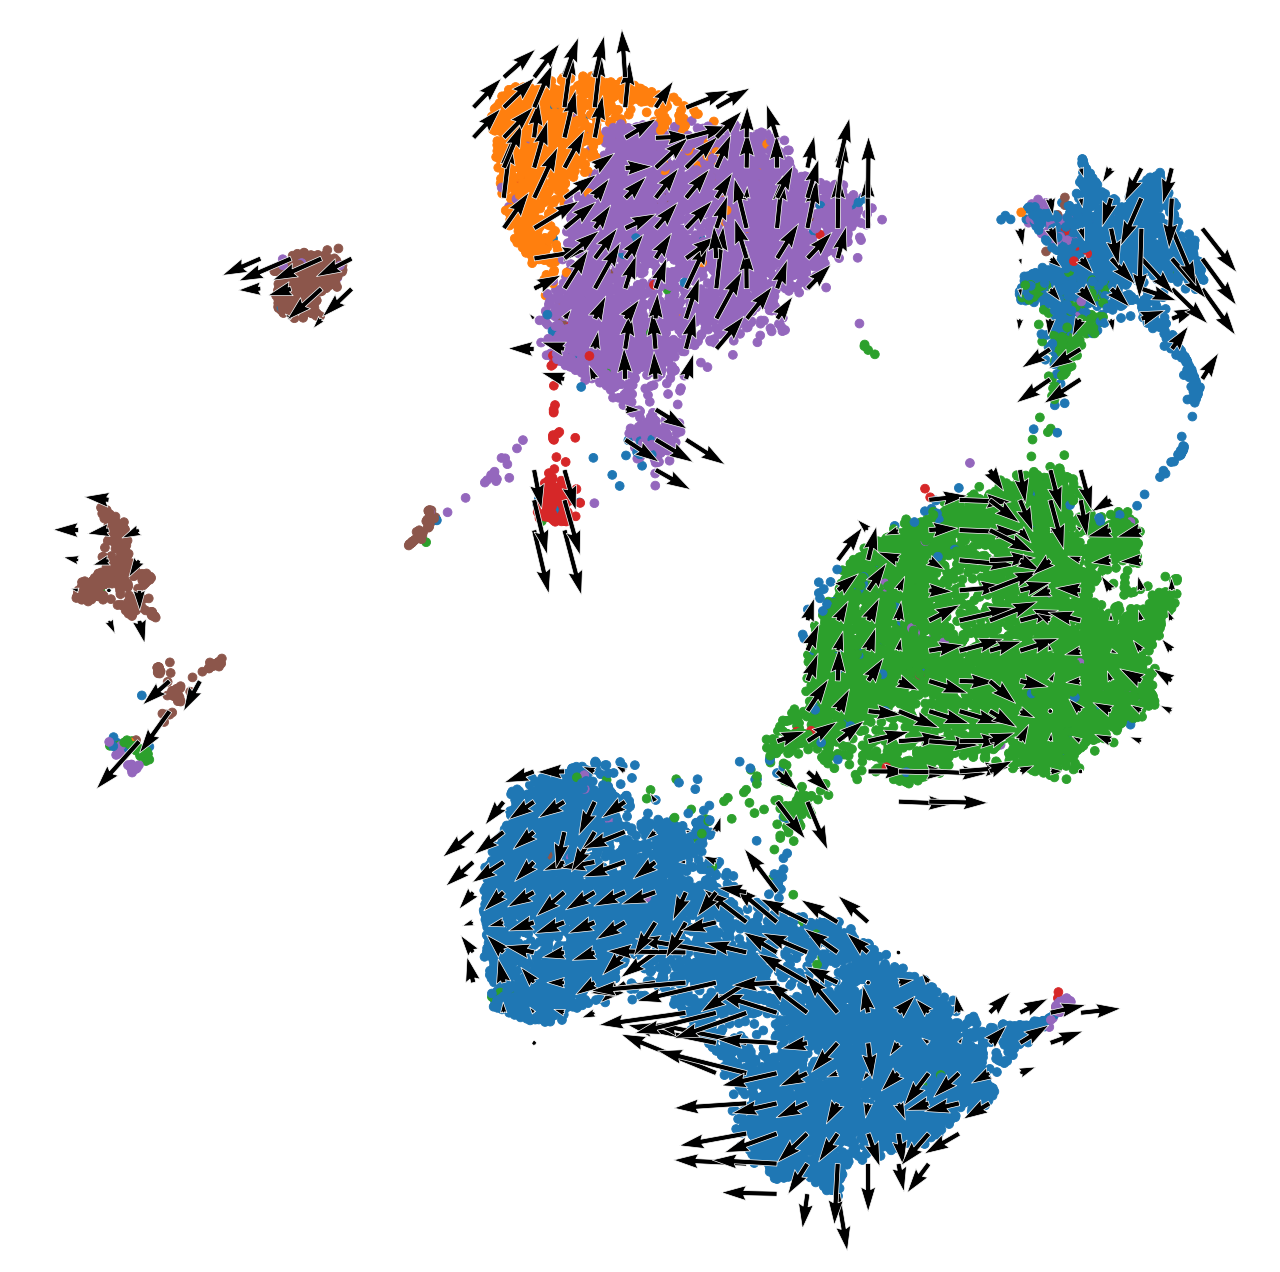

In [58]:
# Plot vector field with cell cluster
fig, ax = plt.subplots(figsize=[8, 8])

oracle.plot_cluster_whole(ax=ax, s=10)
oracle.plot_simulation_flow_on_grid(scale=scale_simulation, ax=ax, show_background=False)